# Lead Scoring Case Study

## Problem Statement

An **education company named X Education sells online courses to industry professionals.** On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites, search engines, and even social media sometimes. **Once these people land on the website, they might browse the courses, fill out a form for the course, or watch some videos. When these people fill out a form with their email address or phone number, they are classified as leads.** Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted into successful sales, while most of the leads do not. **The typical lead to successful sale conversion rate at X education is around 30%.**

Now, although X Education gets a lot of leads, its lead-to-sale conversion rate is very poor. For example, if they acquire 100 leads in a day, only about 30 of them are converted into successful sales. **To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’**. If they successfully identify this set of leads, the lead conversion rate would go up as the sales team would now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e., the leads that are most likely to convert into paying customers. The company requires you to **build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance**. The CEO, in particular, has given a ballpark estimate of the target lead conversion rate as being around 80%.

## Solution divided into following sections:
- Data Understanding
- Data Cleaning and Visualisation
- Data Preparation
- Model Building and Evaluation 

## Data Understanding

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Importing "Leads" Dataset
leads = pd.read_csv(r"C:\Users\UsEr\Desktop\Python(DataScience)\Python\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Dimensions of the dataset
leads.shape

(9240, 37)

In [6]:
# Dataset Description
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Statistical aspects of the datset

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

### Removing missing values

Many of the **categorical variables** have a level called **‘Select’ which needs to be handled because it is as good as a null value** as the customer have not selected any of the category while filing the form.

In [8]:
# Replacing 'Select' into nan value in the dataset

leads.replace('Select', np.nan, inplace=True)

In [9]:
# Checking for missing values column wise

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Checking for missing values column wise(in percentage)

round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Dropping columns with missing values>=45%

leads = leads.loc[:, round((leads.isnull().sum()/len(leads.index))*100,2)<45]
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [12]:
# Checking again for missing values column wise(in percentage)

round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Imputing missing values

#### Country

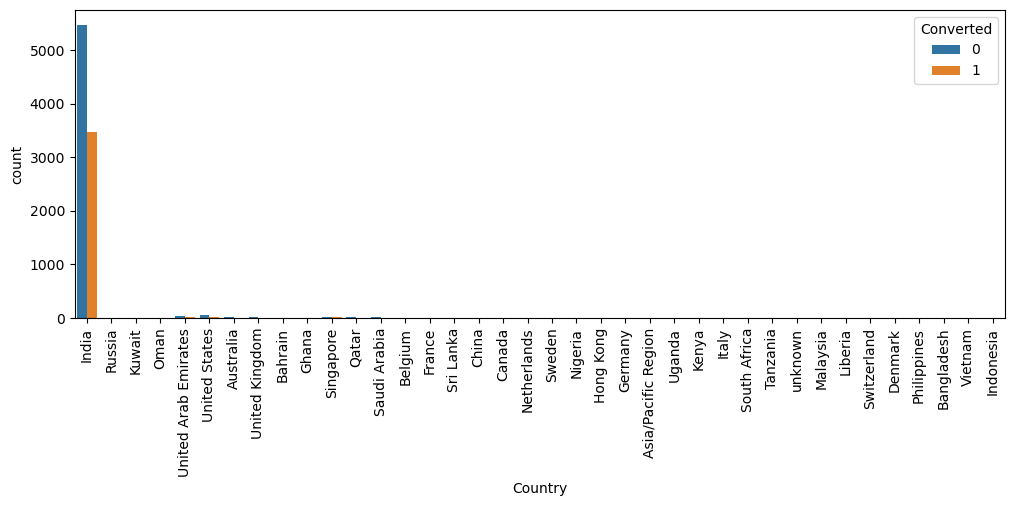

In [13]:
# Imputing missing values with mode in column 'Country'

leads.Country.replace(np.nan, leads.Country.mode()[0], inplace=True)

# countplot on the basis of target variable "Converted"

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Country', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

**India** has higher no. of leads than any other country

#### Specialization

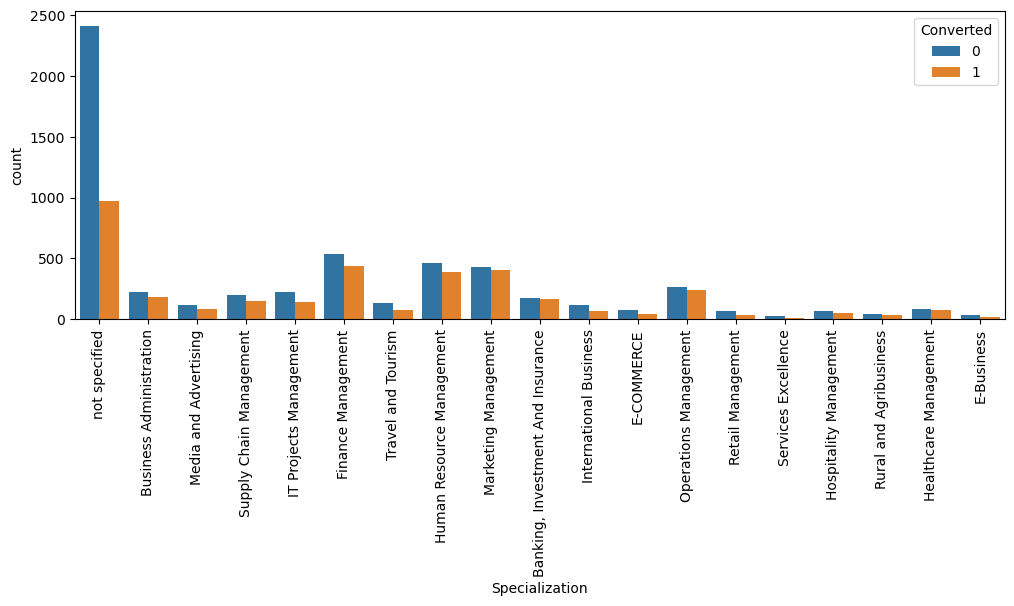

In [14]:
# Imputing missing values with 'not specified' in column 'Specialization'

leads.Specialization.replace(np.nan, 'not specified', inplace=True)

# countplot 

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Specialization', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

Every Management has higher no. of leads as well as conversion and since, several specializations are related to management so they should be by "Management_Spec"

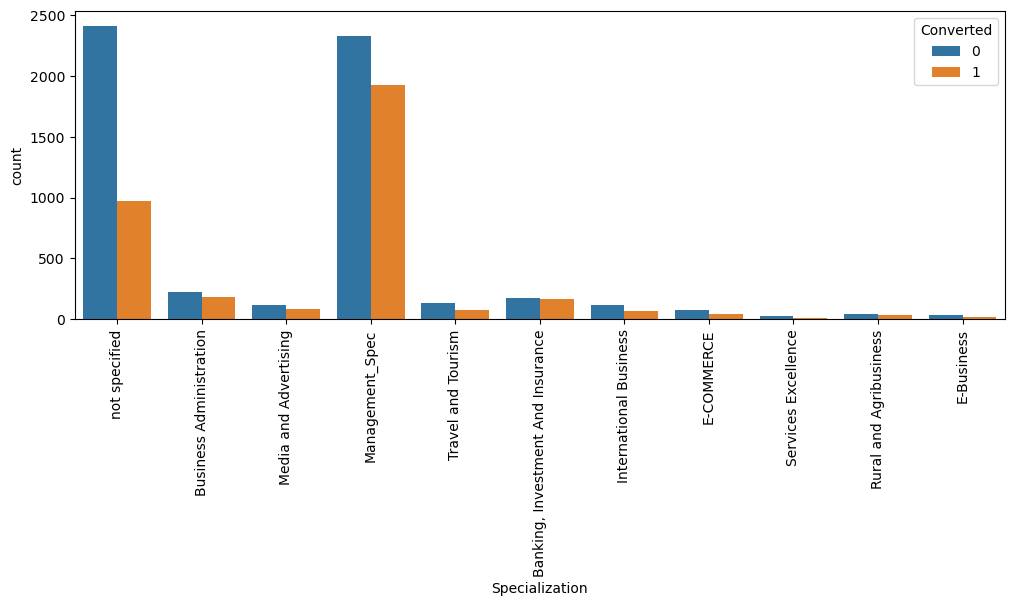

In [15]:
# Replacing different managements with "Management_Spec"

leads.Specialization.replace(['Supply Chain Management', 'IT Projects Management', 'Finance Management', 
                              'Human Resource Management', 'Marketing Management', 'Operations Management',
                              'Retail Management','Hospitality Management', 'Healthcare Management'], 
                            "Management_Spec", inplace= True)

# countplot 

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Specialization', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

#### What is your current occupation

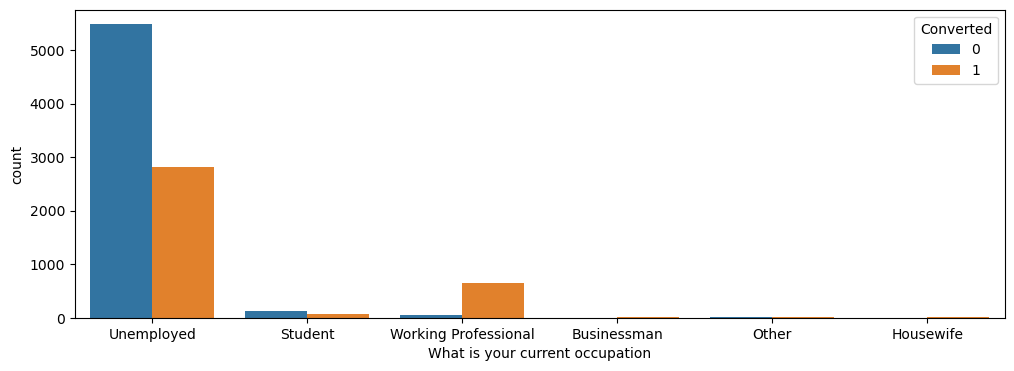

In [16]:
# Imputing missing values with mode in column 'What is your current occupation'

leads['What is your current occupation'].replace(np.nan, leads['What is your current occupation'].mode()[0], inplace=True)

# countplot 

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='What is your current occupation', hue=leads.Converted)
plt.show()

- The **Unemployed** has **high count of leads** but the **Working Professional** has a **high conversion rate** 
- Therfore more focus should be given on working professionals

#### What matters most to you in choosing a course

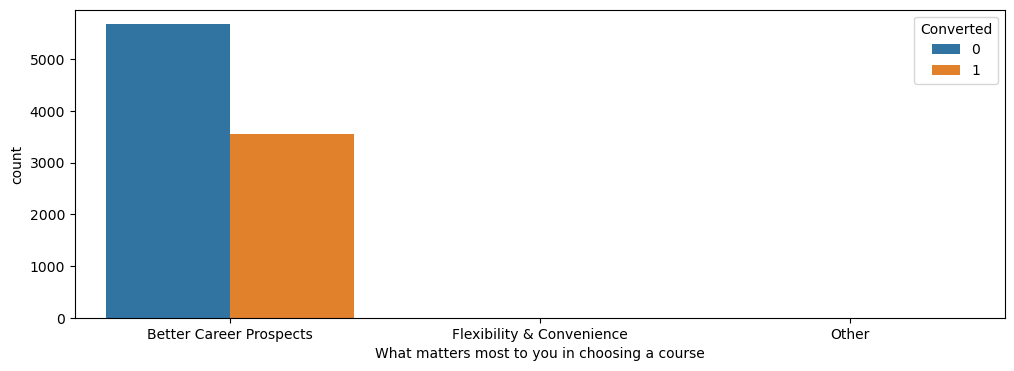

In [17]:
# Imputing missing values with mode in column 'What matters most to you in choosing a course'

leads['What matters most to you in choosing a course'].replace(np.nan, 
                                                               leads['What matters most to you in choosing a course'].mode()[0], 
                                                               inplace=True)

# countplot 

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='What matters most to you in choosing a course', hue=leads.Converted)
plt.show()

#### Tags

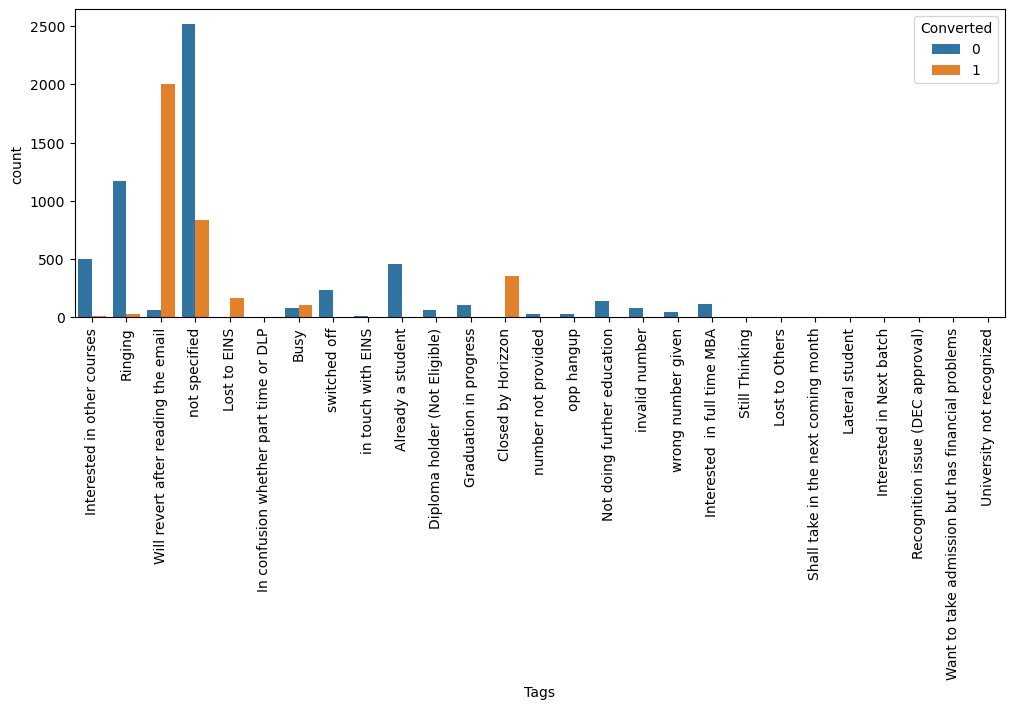

In [18]:
# Imputing missing values with 'not specified' in column 'Tags'

leads.Tags.replace(np.nan, 'not specified', inplace=True)

# Countplot

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Tags', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

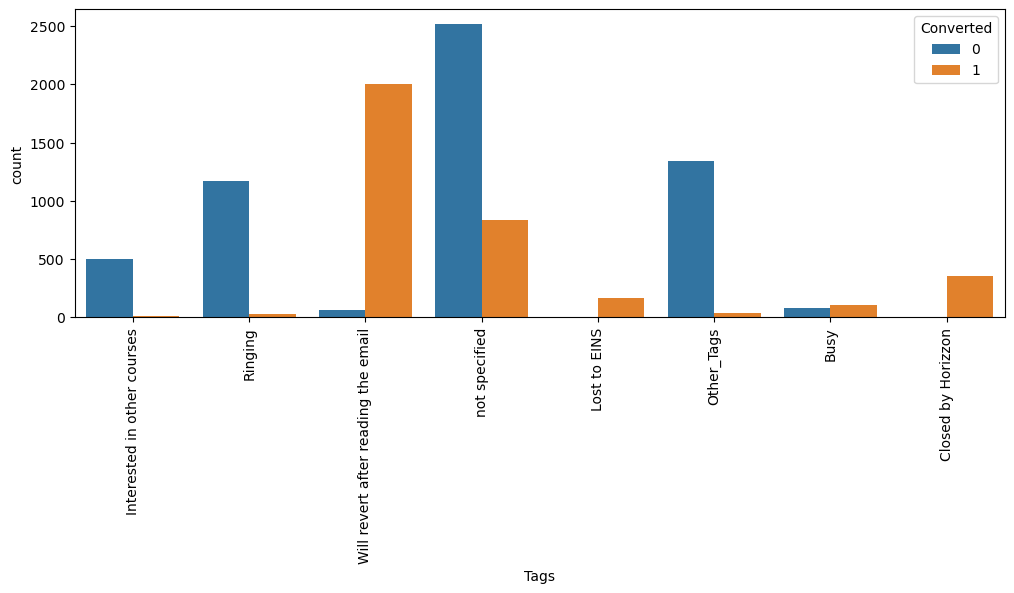

In [19]:
# Replacing low frequency values with "Other_Tags"

leads.Tags.replace(['invalid number', 'wrong number given', 'Interested  in full time MBA', 'Still Thinking',
                    'Lost to Others', 'Shall take in the next coming month', 'Lateral student',
                    'Interested in Next batch', 'Recognition issue (DEC approval)',
                    'Want to take admission but has financial problems', 
                    'Not doing further education', 'Graduation in progress', 'Diploma holder (Not Eligible)',
                    'opp hangup', 'number not provided', 'in touch with EINS', 'In confusion whether part time or DLP',
                    'University not recognized','switched off',
                                      'Already a student'], 'Other_Tags', inplace=True)

# Countplot

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Tags', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

#### City

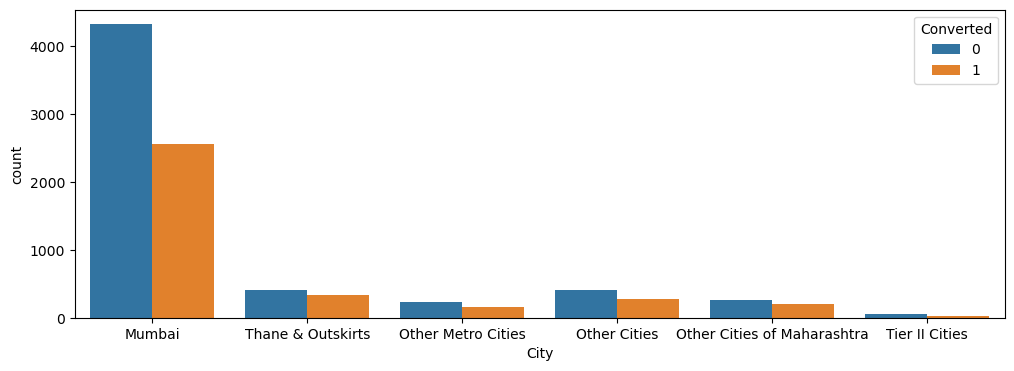

In [20]:
# Imputing missing values with mode in column 'City'

leads.City.replace(np.nan, leads.City.mode()[0], inplace=True)


# Countplot

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='City', hue=leads.Converted)
plt.show()

The **mising values** in the aforementioned columns are being **imputed with their mode** except the ones in **"Specialization"** and **"Tags"** are being imputed with **"not specified"**

In [21]:
# Checking again for missing values column wise(in percentage)

round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

There are still some columns left with **less than 2% missing values** 

#### Lead Source

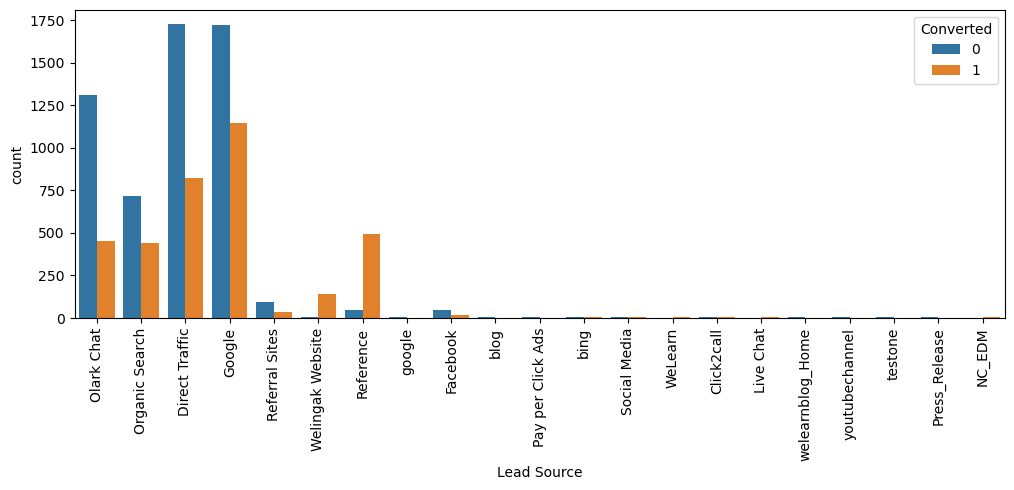

In [22]:
# countplot 

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Lead Source', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

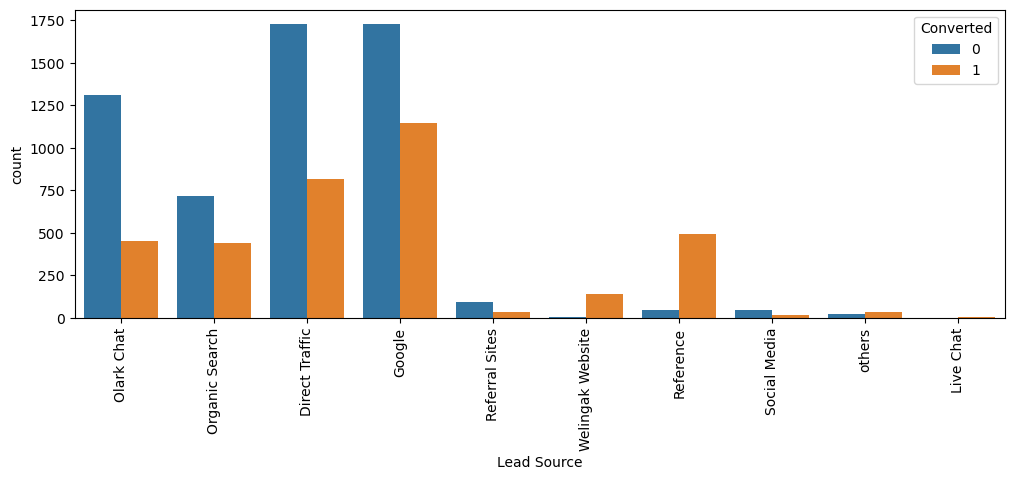

In [23]:
# Replacing 'google' with 'Google' and 'Facebook' with 'Social Media'
# Imputing low frequency levels and missing values with "others"

leads['Lead Source'].replace('google', 'Google', inplace=True)
leads['Lead Source'].replace('Facebook', 'Social Media', inplace=True)
leads['Lead Source'].replace(np.nan, 'others', inplace=True)
leads['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'youtubechannel', 'testone', 
                              'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'],
                             'others', inplace=True)

# countplot 

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Lead Source', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

- "Direct Traffic" and "Google" has higher count of leads but "Reference" has high conversion rate
- Therfore conversion rate has to be improved from "Direct Traffic" and "Google" and also has to generate high amount of leads through "Reference"

#### Last Activity

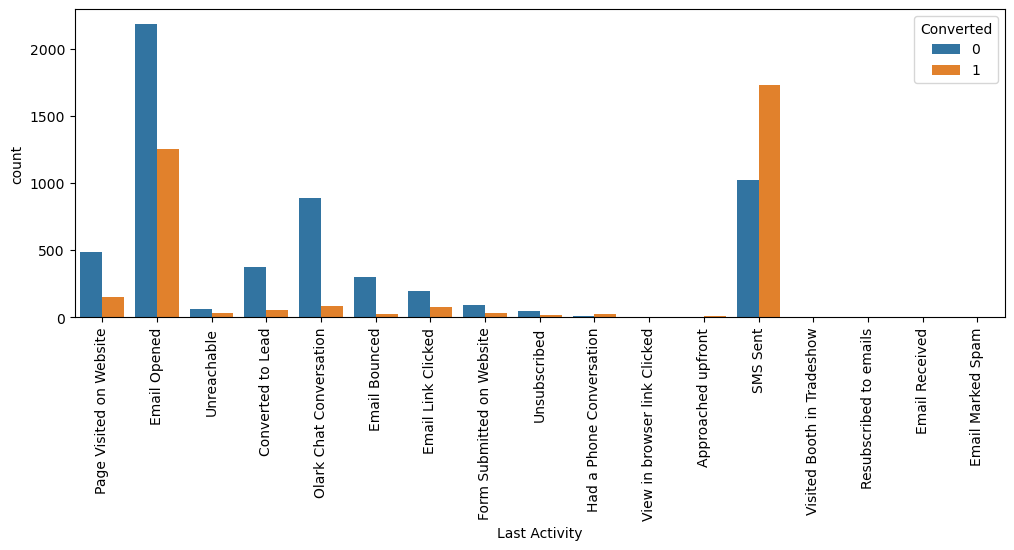

In [24]:
# Countplot

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Last Activity' , hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

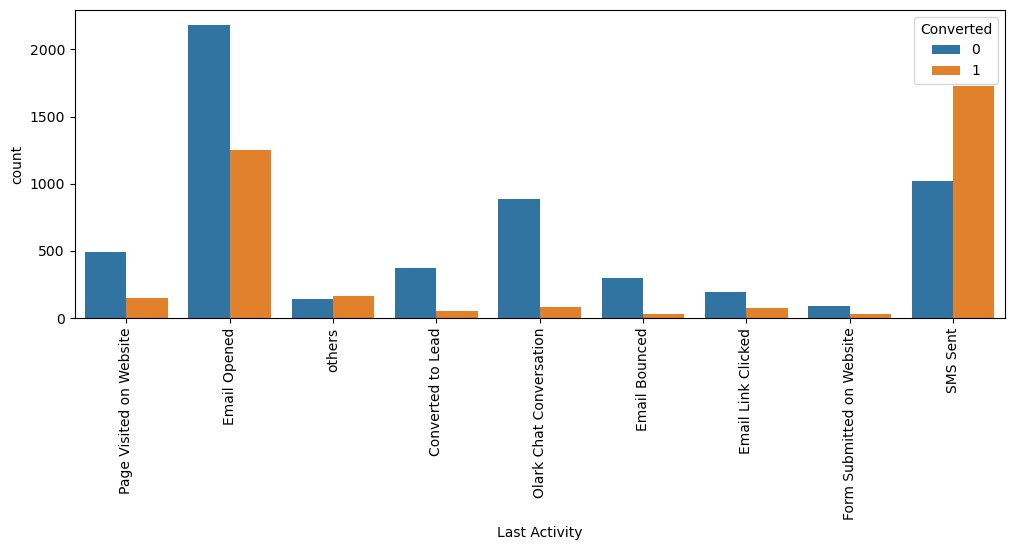

In [25]:
# Replacing missing and low frequency values with 'others'

leads['Last Activity'].replace(np.nan, 'others', inplace=True)
leads['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 
                                'Approached upfront', 'Visited Booth in Tradeshow',
                                'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'others', inplace=True)

# Countplot

plt.figure(figsize=[12,4])
sns.countplot(data=leads, x='Last Activity' , hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [26]:
# Checking again for missing values column wise(in percentage)

round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

Only two numerical columns left with less than 2% missing values so would be better to drop the rows with the missing values

In [27]:
# Droppping rows with missing values

leads.dropna(inplace=True)

# Checking again for missing values

round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

The columns **'Prospect ID', 'Lead Number'** have to be dropped as they cannot be useful for analysis

In [28]:
# dropping columns

leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

### Checking for imbalanced Columns

#### Value count of each column to find the imbalance variable

#### Lead Origin

In [29]:
# count of each value in 'Lead Origin'

leads['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64

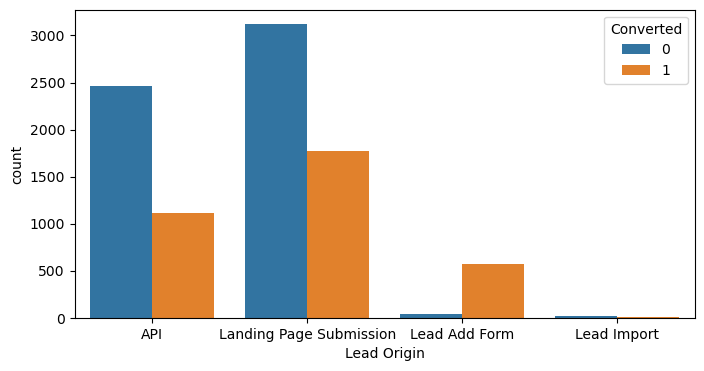

In [30]:
# countplot 

plt.figure(figsize=[8,4])
sns.countplot(data=leads, x='Lead Origin', hue=leads.Converted)
plt.show()

- Both 'API' and 'Landing Page submission' have higher no. of leads as well as conversion.

- The 'lead add form' has a high conversion rate although the count of leads are lower.

- Therefore the conversion rate has to be increased through the 'API' and 'Landing Page submission' and have to increase the leads from 'lead add form' 

#### Do not Email and Do not Call

No     0.920466
Yes    0.079534
Name: Do Not Email, dtype: float64 

 No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64


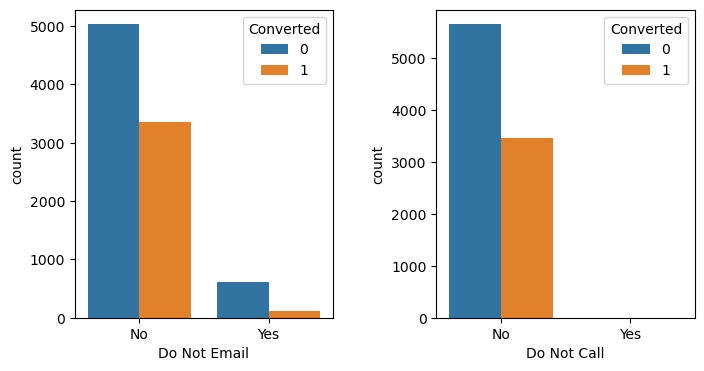

In [31]:
# Value count 
print(leads['Do Not Email'].value_counts(normalize=True), 
      '\n\n', leads['Do Not Call'].value_counts(normalize=True))

# countplot 

plt.figure(figsize=[8,4])
plt.subplots_adjust(wspace=.4)

plt.subplot(1,2,1)
sns.countplot(data=leads, x='Do Not Email', hue=leads.Converted)

plt.subplot(1,2,2)
sns.countplot(data=leads, x='Do Not Call', hue=leads.Converted)

plt.show()

#### Imbalanced Columns to be dropped

There are some columns to be dropped as **90% of their data comes from one value** which make them **imbalanced variables**

In [32]:
# list of columns to be dropped

drop_col = ['Country', 'Do Not Call', 'What matters most to you in choosing a course']

In [33]:
# value count of columns "Search, Magazine, Newspaper Article"

print(leads.Search.value_counts(normalize=True), '\n\n',
     
      leads.Magazine.value_counts(normalize=True), '\n\n',
     
     leads['Newspaper Article'].value_counts(normalize=True))


No     0.998462
Yes    0.001538
Name: Search, dtype: float64 

 No    1.0
Name: Magazine, dtype: float64 

 No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64


In [34]:
# value count of columns "X Education Forums, Newspaper"

print(leads['X Education Forums'].value_counts(normalize=True), '\n\n',
      
      leads.Newspaper.value_counts(normalize=True))

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64 

 No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64


In [35]:
# value count of columns "Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses"

print(leads['Digital Advertisement'].value_counts(normalize=True), '\n\n')

print(leads['Through Recommendations'].value_counts(normalize=True), '\n\n')

print(leads['Receive More Updates About Our Courses'].value_counts(normalize=True))

No     0.999561
Yes    0.000439
Name: Digital Advertisement, dtype: float64 


No     0.999231
Yes    0.000769
Name: Through Recommendations, dtype: float64 


No    1.0
Name: Receive More Updates About Our Courses, dtype: float64


In [36]:
# value count of columns "Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque
# and A free copy of Mastering The Interview"

print(leads['Update me on Supply Chain Content'].value_counts(normalize=True), '\n\n', 

      leads['Get updates on DM Content'].value_counts(normalize=True),'\n\n', 
      
      leads['I agree to pay the amount through cheque'].value_counts(normalize=True), '\n\n', 

      leads['A free copy of Mastering The Interview'].value_counts(normalize=True))

No    1.0
Name: Update me on Supply Chain Content, dtype: float64 

 No    1.0
Name: Get updates on DM Content, dtype: float64 

 No    1.0
Name: I agree to pay the amount through cheque, dtype: float64 

 No     0.682742
Yes    0.317258
Name: A free copy of Mastering The Interview, dtype: float64


In [37]:
# Adding imbalanced columns in the drop list of columns

drop_col.extend(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
                 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'])

Modified                        0.359222
Email Opened                    0.310557
SMS Sent                        0.238603
Page Visited on Website         0.034934
Olark Chat Conversation         0.020103
Email Link Clicked              0.019005
Email Bounced                   0.006591
Unsubscribed                    0.005163
Unreachable                     0.003515
Had a Phone Conversation        0.001538
Email Marked Spam               0.000220
Approached upfront              0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Email Received                  0.000110
Name: Last Notable Activity, dtype: float64


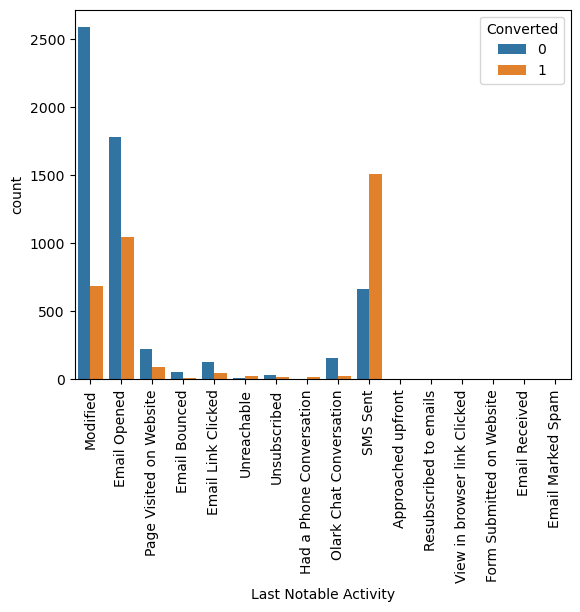

In [38]:
# value count of column "Last Notable Activity"

print(leads['Last Notable Activity'].value_counts(normalize=True))

# countplot

sns.countplot(data=leads, x='Last Notable Activity', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Replacing low frequency values with 'Other_Activities' in column 'Last Notable Activity'

leads['Last Notable Activity'].replace(['Email Bounced', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 
                                        'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked',
                                        'Form Submitted on Website', 'Email Received',
                                        'Email Marked Spam'], 'Other_Activities', inplace=True)


# countplot

sns.countplot(data=leads, x='Last Notable Activity', hue=leads.Converted)
plt.xticks(rotation=90)
plt.show()

- The **convesrion rate** for the **Last Notable Activity** being **"SMS Sent"** is the **highest**, therefore the generation of leads should be more from this category.

### Dropping Imbalanced Columns

In [39]:
# Columns to be dropped

leads.drop(drop_col, axis=1, inplace=True)

# checking the dataframe

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

## Data Visualisation

### Univariate Numerical Anaysis

#### Target variable 'Converted'

0    0.619796
1    0.380204
Name: Converted, dtype: float64


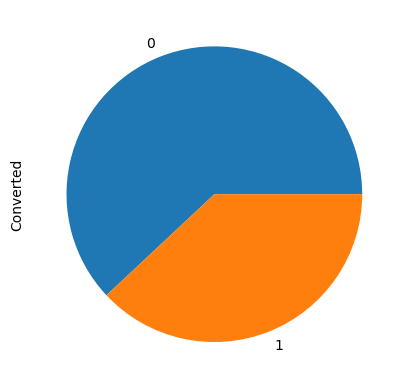

In [40]:
# value count

print(leads.Converted.value_counts(normalize=True))

# pie plot

leads.Converted.value_counts(normalize=True).plot.pie()
plt.show()

Only **38.02%** of whole data are being **converted** 

#### Total Visits

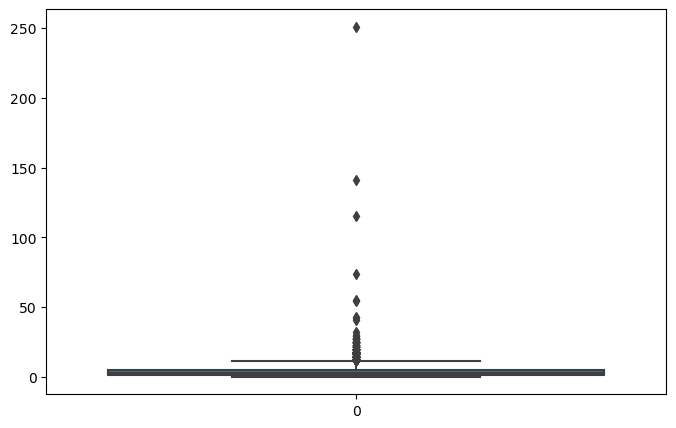

In [41]:
# boxplot

plt.figure(figsize=[8,5])
sns.boxplot(leads.TotalVisits)
plt.show()

There are **outliers present** which have to be treated

In [42]:
# percentile values

leads.TotalVisits.describe(percentiles=[0.05, .25, .50, .75, .90, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [ ]:
# Removing 1% outliers from the top and bottom 

q1 = leads.TotalVisits.quantile(.01)

q3 = leads.TotalVisits.quantile(.99)

leads = leads[(leads.TotalVisits>=q1) & (leads.TotalVisits<=q3)]

# boxplot

sns.boxplot(leads.TotalVisits)
plt.show()

#### Total Time Spent on Website   

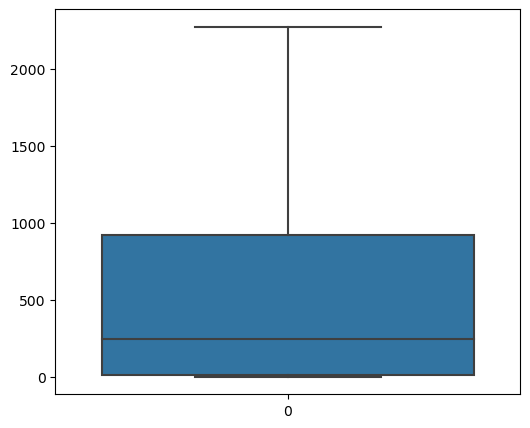

In [43]:
# boxplot

plt.figure(figsize=[6,5])
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

In [44]:
# percentile values

leads['Total Time Spent on Website'].describe(percentiles=[0.05, .25, .50, .75, .90, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

**No outliers** present so no treatment

#### Page Views Per Visit

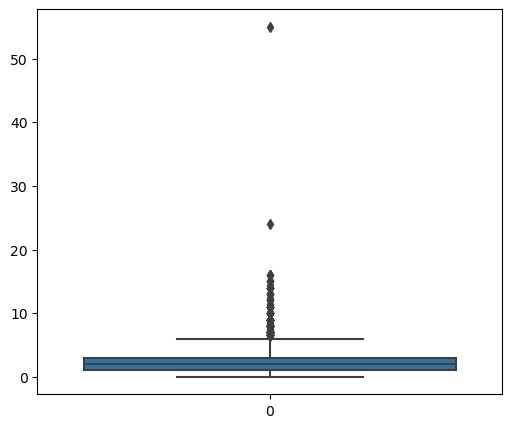

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [45]:
# boxplot

plt.figure(figsize=[6,5])
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

# percentile values

leads['Page Views Per Visit'].describe(percentiles=[0.05, .25, .50, .75, .90, .99])

In [ ]:
# Removing 1% outliers from the top and bottom 

q1 = leads['Page Views Per Visit'].quantile(.01)

q3 = leads['Page Views Per Visit'].quantile(.99)

leads = leads[(leads['Page Views Per Visit']>=q1) & (leads['Page Views Per Visit']<=q3)]

# boxplot

plt.figure(figsize=[6,5])
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [46]:
# shape of the dataframe
leads.shape

(9103, 14)

### Bivariate Numeric Analysis

#### Total Visits vs Converted

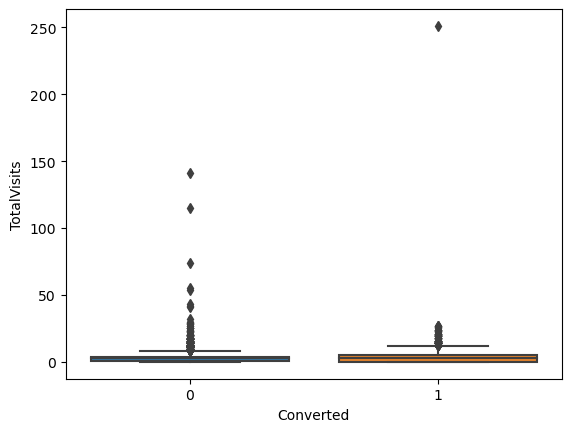

In [47]:
# boxplot 

sns.boxplot(x='Converted', y='TotalVisits', data=leads)
plt.show()

- The median for both are same so no useful results

#### Total Time Spent on Website vs Converted

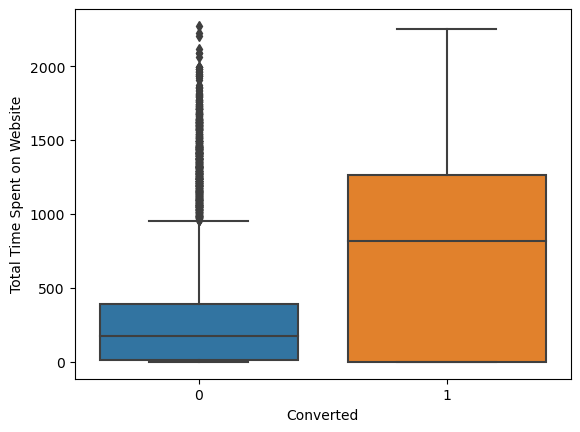

In [48]:
# boxplot 

sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads)
plt.show()

- The leads spending more time on website are more likely to get converted
- The website should be improved to increase the conversion rate

#### Page Views Per Visit vs Converted

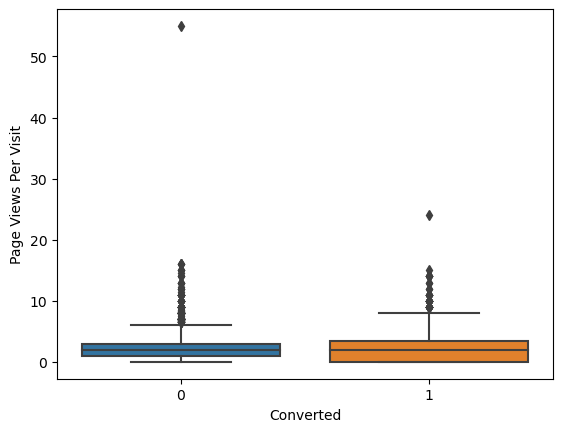

In [49]:
# boxplot 

sns.boxplot(x='Converted', y='Page Views Per Visit', data=leads)
plt.show()

- The median is same for both so no specific inferences can be made

### Multivariate Analysis

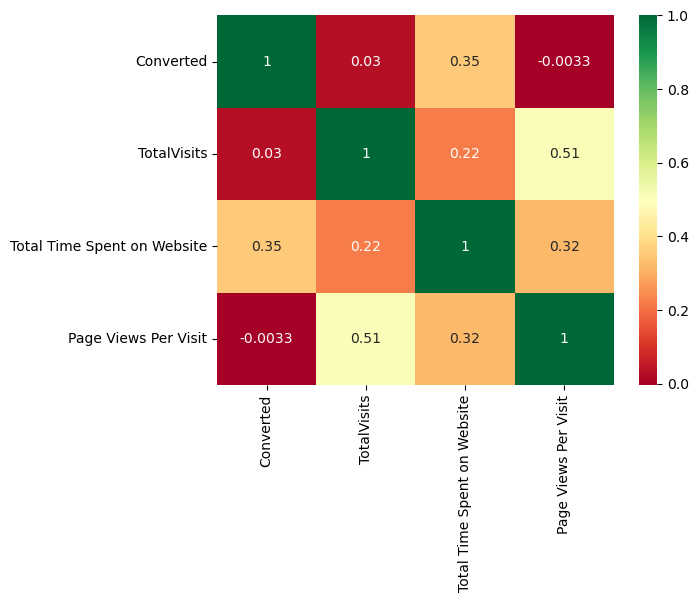

In [50]:
# correlation heatmap

sns.heatmap(leads.corr(), cmap='RdYlGn', annot=True)
plt.show()

- The target variable "Converted" has a medium correlation with variable "Total time spent on website".
- Total visits and Page views per visit have a high correlation.

## Data Preparation

In [51]:
# checking the dataframe

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,not specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,not specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,not specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


### Binary mapping

In [52]:
# list of variables to map

varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# mapping 
leads[varlist] = leads[varlist].apply(binary_map)

# checking the dataframe

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,not specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,not specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,not specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


### Dummy Variables

In [53]:
# creating dummy variables for some categorical variables and dropping first one

dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation', 'City']], drop_first=True)

# adding dummy to the 'leads' dataframe

leads = pd.concat([leads, dummy], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,not specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,not specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,others,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,not specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [1]:
# dropping original varaibles for which dummies are being created
# dropping 'Do Not Email', 'A free copy of Mastering The Interview' as won't be helpful in analysis

leads.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization', 'What is your current occupation', 
            'Tags', 'City', 'Last Notable Activity', 
            'Do Not Email', 'A free copy of Mastering The Interview'], axis=1, inplace=True )
leads.head()

NameError: name 'leads' is not defined

### Splitting of Data into train and test data

In [2]:
# import required library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [57]:
# variable X
X = leads.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [58]:
# response variable
y = leads.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [60]:
# shape of X_train
print('X_train: ', X_train.shape,'\n'
     'X_test: ', X_test.shape)

X_train:  (6372, 50) 
X_test:  (2731, 50)


### Feature scaling

In [61]:
# Standardised scaling
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 
                                                                    'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7962,-0.092900,1.476324,-0.394072,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5520,0.695064,-0.771066,2.111481,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1962,0.301082,-0.571257,0.061483,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1566,2.074000,1.393834,0.517039,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9170,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## Model Building

### Running first model using statsmodels

In [62]:
# importing required library
import statsmodels.api as sm

In [63]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1277.7
Date:                Thu, 14 Sep 2023   Deviance:                       2555.4
Time:                        14:53:10   Pearson chi2:                 8.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4052      1.976     -0.205      0.838      -4.278       3.467
TotalVisits                                              0.1959      0.060      3.279      0.001       0.079       0.313
Total Time Spent on Website                              1.0909      0.061     17.844      0.000       0.971       1.211
Page Views Per Visit                                    -0.1038      0.077     -1.351      0.177      -0.254       0.047
Lead Origin_Landing Page Submission                     -0.6991      0.226     -3.100      0.002      -1.141      -0.257
Lead Origin_Lead Add Form                                1.7923      1.208      1.483      0.138      -0.576       4.161
Lead Origin_Lead Import                                  1.7684      1.596      1.108      0.268      -1.360       4.897
What is your current occupation_Housewife               19.3502   1.67e+04      0.001      0.999   -3.27e+04    3.27e+04
What is your current occupation_Other                   -0.0337      2.232     -0.015      0.988      -4.408       4.341
What is your current occupation_Student                 -0.1452      1.834     -0.079      0.937      -3.739       3.449
What is your current occupation_Unemployed              -0.2038      1.738     -0.117      0.907      -3.610       3.203
What is your current occupation_Working Professional     0.5688      1.772      0.321      0.748      -2.904       4.042
City_Other Cities                                       -0.2676      0.224     -1.195      0.232      -0.706       0.171
City_Other Cities of Maharashtra                        -0.2073      0.262     -0.791      0.429      -0.721       0.307
City_Other Metro Cities                                  0.3120      0.279      1.120      0.263      -0.234       0.858
City_Thane & Outskirts                                  -0.0230      0.220     -0.104      0.917      -0.455       0.409
City_Tier II Cities                                      0.4174      0.602      0.693      0.488      -0.763       1.598
Lead Source_Direct Traffic                              -0.9907      0.883     -1.122      0.262      -2.722       0.740
Lead Source_Google                                      -0.8506      0.880     -0.966      0.334      -2.576       0.874
Lead Source_Live Chat                                   16.1155   3.41e+04      0.000      1.000   -6.68e+04    6.68e+04
Lead Source_Olark Chat                                   0.0715      0.886      0.081      0.936      -1.666       1.809
Lead Source_Organic Search                              -0.7883      0.890     -0.886      0.376      -2.533       0.956
Lead Source_Reference                                   -1

### Feature selection using RFE

In [64]:
# importing library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [65]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True])

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 30),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('What is your current occupation_Housewife', False, 12),
 ('What is your current occupation_Other', False, 31),
 ('What is your current occupation_Student', False, 21),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 4),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 24),
 ('City_Other Metro Cities', False, 15),
 ('City_Thane & Outskirts', False, 32),
 ('City_Tier II Cities', False, 14),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_R

In [67]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [68]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-

#### Assessing the model with StatsModels

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1511.3
Date:                Thu, 14 Sep 2023   Deviance:                       3022.5
Time:                        14:53:32   Pearson chi2:                 8.24e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5740
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3914      0.079    -17.563      0.000      -1.547      -1.236
Lead Origin_Lead Add Form                    0.8678      0.406      2.139      0.032       0.073       1.663
Lead Source_Direct Traffic                  -0.4377      0.118     -3.720      0.000      -0.668      -0.207
Lead Source_Organic Search                   0.0671      0.143      0.471      0.638      -0.212       0.347
Lead Source_Referral Sites                  -0.3473      0.428     -0.812      0.417      -1.186       0.491
Lead Source_Welingak Website                 3.3514      0.836      4.009      0.000       1.713       4.990
Last Activity_Converted to Lead             -1.3511      0.342     -3.949      0.000      -2.022      -0.680
Last Activity_Email Bounced                 -1.6106      0.417     -3.862      0.000      -2.428      -0.793
Last Activity_Olark Chat Conversation       -1.5843      0.213     -7.451      0.000      -2.001      -1.168
Last Activity_SMS Sent                       1.7516      0.103     17.008      0.000       1.550       1.953
Tags_Closed by Horizzon                      5.9933      0.721      8.312      0.000       4.580       7.407
Tags_Interested in other courses            -2.1810      0.349     -6.257      0.000      -2.864      -1.498
Tags_Lost to EINS                            6.0544      0.727      8.327      0.000       4.629       7.480
Tags_Other_Tags                             -2.3003      0.199    -11.559      0.000      -2.690      -1.910
Tags_Ringing                                -3.0871      0.230    -13.430      0.000      -3.538      -2.637
Tags_Will revert after reading the email     4.5724      0.177     25.827      0.000       4.225       4.919
============================================================================================================
"""

In [70]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.125628
5520    0.138342
1962    0.125628
1566    0.960113
9170    0.024322
5097    0.199181
8954    0.040520
309     0.960113
5519    0.589080
1050    0.960113
dtype: float64

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12562844, 0.13834224, 0.12562844, 0.96011334, 0.02432187,
       0.19918139, 0.04051969, 0.96011334, 0.58907957, 0.96011334])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [72]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.125628,7962
1,0,0.138342,5520
2,0,0.125628,1962
3,1,0.960113,1566
4,0,0.024322,9170


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [73]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.125628,7962,0
1,0,0.138342,5520,0
2,0,0.125628,1962,0
3,1,0.960113,1566,1
4,0,0.024322,9170,0


#### Confusion Matrix

In [74]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3739  214]
 [ 373 2046]]


In [75]:
# Predicted     not_converted    converted
# Actual
# not_converted        3691      191
# converted            281       2104  

In [76]:
# checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9078782172002511


#### Checking VIFs

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Welingak Website,1.35
9,Tags_Closed by Horizzon,1.17
6,Last Activity_Email Bounced,1.06
11,Tags_Lost to EINS,1.03
3,Lead Source_Referral Sites,1.02
0,Lead Origin_Lead Add Form,0.69
10,Tags_Interested in other courses,0.36
7,Last Activity_Olark Chat Conversation,0.27
12,Tags_Other_Tags,0.27
1,Lead Source_Direct Traffic,0.18


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable **'Last Notable Activity_SMS Sent' has the highest VIF** so it has to be dropped.

In [79]:
# dropping variable with high VIF
col = col.drop('Last Notable Activity_SMS Sent',1)
col

KeyError: "['Last Notable Activity_SMS Sent'] not found in axis"

In [80]:
# re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1511.3
Date:                Thu, 14 Sep 2023   Deviance:                       3022.5
Time:                        14:54:05   Pearson chi2:                 8.24e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5740
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3914      0.079    -17.563      0.000      -1.547      -1.236
Lead Origin_Lead Add Form                    0.8678      0.406      2.139      0.032       0.073       1.663
Lead Source_Direct Traffic                  -0.4377      0.118     -3.720      0.000      -0.668      -0.207
Lead Source_Organic Search                   0.0671      0.143      0.471      0.638      -0.212       0.347
Lead Source_Referral Sites                  -0.3473      0.428     -0.812      0.417      -1.186       0.491
Lead Source_Welingak Website                 3.3514      0.836      4.009      0.000       1.713       4.990
Last Activity_Converted to Lead             -1.3511      0.342     -3.949      0.000      -2.022      -0.680
Last Activity_Email Bounced                 -1.6106      0.417     -3.862      0.000      -2.428      -0.793
Last Activity_Olark Chat Conversation       -1.5843      0.213     -7.451      0.000      -2.001      -1.168
Last Activity_SMS Sent                       1.7516      0.103     17.008      0.000       1.550       1.953
Tags_Closed by Horizzon                      5.9933      0.721      8.312      0.000       4.580       7.407
Tags_Interested in other courses            -2.1810      0.349     -6.257      0.000      -2.864      -1.498
Tags_Lost to EINS                            6.0544      0.727      8.327      0.000       4.629       7.480
Tags_Other_Tags                             -2.3003      0.199    -11.559      0.000      -2.690      -1.910
Tags_Ringing                                -3.0871      0.230    -13.430      0.000      -3.538      -2.637
Tags_Will revert after reading the email     4.5724      0.177     25.827      0.000       4.225       4.919
============================================================================================================
"""

In [81]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.12562844, 0.13834224, 0.12562844, 0.96011334, 0.02432187,
       0.19918139, 0.04051969, 0.96011334, 0.58907957, 0.96011334])

In [82]:
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.125628,7962,0
1,0,0.138342,5520,0
2,0,0.125628,1962,0
3,1,0.960113,1566,1
4,0,0.024322,9170,0


##### Checking the VIFs again

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Welingak Website,1.35
9,Tags_Closed by Horizzon,1.17
6,Last Activity_Email Bounced,1.06
11,Tags_Lost to EINS,1.03
3,Lead Source_Referral Sites,1.02
0,Lead Origin_Lead Add Form,0.69
10,Tags_Interested in other courses,0.36
7,Last Activity_Olark Chat Conversation,0.27
12,Tags_Other_Tags,0.27
1,Lead Source_Direct Traffic,0.18


Now, all the variables have a **good VIF**, therefore the predictions can be proceeded.

In [84]:
# checking the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3739,  214],
       [ 373, 2046]], dtype=int64)

In [85]:
# Predicted         not_converted    converted
# Actual
    # not_converted        3693      189
    # converted            280       2105  

In [86]:
# check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9078782172002511


The overall Accuracy is exactly the same as before.

#### Other Metrics beyond accuracy

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# sensitivity 
TP / float(TP+FN)

0.8458040512608516

In [89]:
# specificity
TN / float(TN+FP)

0.945863900834809

In [90]:
#  false postive rate
FP/ float(TN+FP)

0.05413609916519099

In [91]:
# positive predictive value 
TP / float(TP+FP)

0.9053097345132743

In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9092898832684825


### Plotting the ROC Curve

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

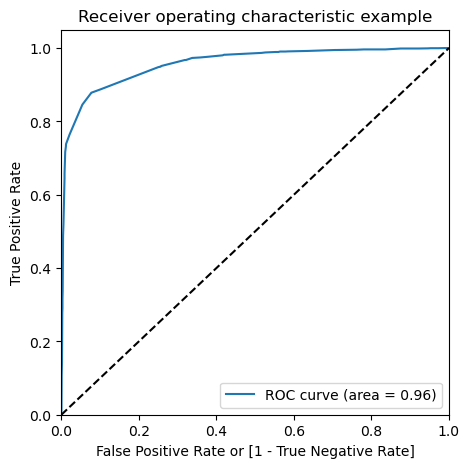

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [95]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.125628,7962,0,1,1,0,0,0,0,0,0,0,0
1,0,0.138342,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.125628,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.960113,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.024322,9170,0,1,0,0,0,0,0,0,0,0,0


In [96]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.780289  0.973129  0.662282
0.2   0.2  0.894382  0.887557  0.898558
0.3   0.3  0.905838  0.877222  0.923349
0.4   0.4  0.905681  0.876395  0.923602
0.5   0.5  0.907878  0.845804  0.945864
0.6   0.6  0.897363  0.763952  0.979003
0.7   0.7  0.893126  0.737908  0.988110
0.8   0.8  0.890772  0.731294  0.988363
0.9   0.9  0.884809  0.712278  0.990387


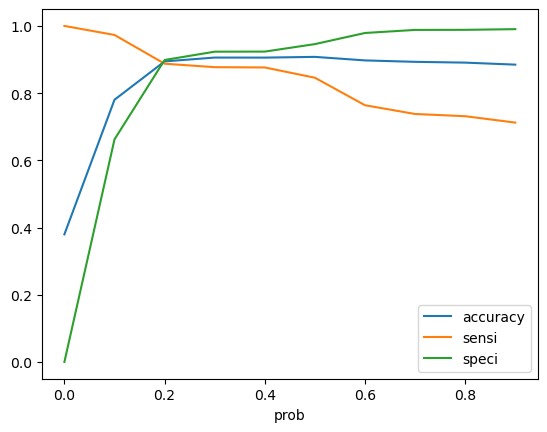

In [97]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, **0.3 is the optimum point** to take it as a **cutoff probability**.

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.125628,7962,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.138342,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.125628,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.960113,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.024322,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9058380414312618

In [101]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3650,  303],
       [ 297, 2122]], dtype=int64)

In [102]:
# Predicted         not_converted    converted
# Actual
    # not_converted        3595      287
    # converted            198       2187  

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Accuracy
float(TP+TN)/float(TP+TN+FP+FN)

0.9058380414312618

In [105]:
# sensitivity 
TP / float(TP+FN)

0.8772219925589086

In [106]:
# specificity
TN / float(TN+FP)

0.9233493549203137

In [107]:
# Calculate false postive rate
FP/ float(TN+FP)

0.07665064507968632

In [108]:
# Positive predictive value 
TP / float(TP+FP)

0.8750515463917525

In [109]:
# Negative predictive value
TN / float(TN+ FN)

0.9247529769445149

#### Observations from Train data
- ROC curve = 0.97
- Accuracy = 92.26%
- Sensitivity = 91.69%
- Specifity = 92.6%

### Precision and Recall

In [110]:
# checking Confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3650,  303],
       [ 297, 2122]], dtype=int64)

#### Precision
TP / TP + FP

In [111]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8750515463917525

#### Recall
TP / TP + FN

In [112]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8772219925589086

In [113]:
# using sklearn utilities
from sklearn.metrics import precision_score, recall_score

#precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8750515463917525

In [114]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8772219925589086

### Precision and recall tradeoff

In [115]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: final_predicted, Length: 6372, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# tradeoff plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('threshold')
plt.show()

## Model Evaluation

In [116]:
# scaling of test data
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 
                                                                'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,-0.092900,-0.103815,0.289261,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4050,-0.683873,-0.881052,-1.077404,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7201,-0.289891,0.424120,-0.166294,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1196,0.104091,-0.105648,0.744816,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
8219,0.695064,-0.428274,-0.280183,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [117]:
# assigning columns with good VIF values

X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4050,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7201,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1196,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8219,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [118]:
# adding constant
X_test_sm = sm.add_constant(X_test)

### Predictions on test set

In [119]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.011993
4050    0.996983
7201    0.084875
1196    0.011993
8219    0.985590
8747    0.199181
9048    0.210107
6524    0.024322
7693    0.084875
8187    0.134809
dtype: float64

In [120]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.011993
4050,0.996983
7201,0.084875
1196,0.011993
8219,0.985590


In [121]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [122]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [123]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.011993
1,1,4050,0.996983
2,0,7201,0.084875
3,0,1196,0.011993
4,1,8219,0.985590


In [124]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3504,0,0.011993
1,4050,1,0.996983
2,7201,0,0.084875
3,1196,0,0.011993
4,8219,1,0.985590


In [125]:
# taking perspective of sensivity-specificity, threshold = 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)  

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3504,0,0.011993,0
1,4050,1,0.996983,1
2,7201,0,0.084875,0
3,1196,0,0.011993,0
4,8219,1,0.985590,1


In [126]:
# overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9073599414134017

In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1558,  131],
       [ 122,  920]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# sensitivity 
TP / float(TP+FN)

0.8829174664107485

In [130]:
# specificity
TN / float(TN+FP)

0.9224393132030787

In [131]:
# precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8753568030447193

In [132]:
# recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8829174664107485

#### Observations from Test data

- Accuracy = 92.7%
- Sensitivity = 91.78%
- Specificity = 93.25%

#### Observations from Train data
- Accuracy = 92.26%
- Sensitivity = 91.69%
- Specificity = 92.6%

### Conclusion

The model is predicting a very well Conversion Rate. Through this model the CEO and its team can make better decisions to improve their sales.